# Part 2
***********

![smitty](https://i.imgur.com/jNYC9op.gif "smitty")

### warning: suicide is mentioned multiple times throughout this presentation 
**************

In [1]:

!pip install pandas numpy matplotlib 

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl


In [3]:

file = "https://raw.githubusercontent.com/BIOF309/group-project-hacking-pythonistas/master/notebooks/death.csv"
df1 = pd.read_csv(file)


# Exploring the dataset

-------------------------- 
### Viewing head, columns, shape, and info

In [4]:
print(df1.head())

   Year                                     113 Cause Name  \
0  2016  Accidents (unintentional injuries) (V01-X59,Y8...   
1  2016  Accidents (unintentional injuries) (V01-X59,Y8...   
2  2016  Accidents (unintentional injuries) (V01-X59,Y8...   
3  2016  Accidents (unintentional injuries) (V01-X59,Y8...   
4  2016  Accidents (unintentional injuries) (V01-X59,Y8...   

               Cause Name       State  Deaths  Age-adjusted Death Rate  
0  Unintentional injuries     Alabama    2755                     55.5  
1  Unintentional injuries      Alaska     439                     63.1  
2  Unintentional injuries     Arizona    4010                     54.2  
3  Unintentional injuries    Arkansas    1604                     51.8  
4  Unintentional injuries  California   13213                     32.0  


In [5]:
print(df1.columns)

Index(['Year', '113 Cause Name', 'Cause Name', 'State', 'Deaths',
       'Age-adjusted Death Rate'],
      dtype='object')


In [6]:
print(df1.shape)

(10296, 6)


In [7]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 6 columns):
Year                       10296 non-null int64
113 Cause Name             10296 non-null object
Cause Name                 10296 non-null object
State                      10296 non-null object
Deaths                     10296 non-null int64
Age-adjusted Death Rate    10296 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 482.7+ KB
None


## Indexed by state and dropped an unneeded column 

----------

In [28]:
death = pd.read_csv(file, index_col='State')
death = death.drop("113 Cause Name", axis=1)
print(death.head())

            Year              Cause Name  Deaths  Age-adjusted Death Rate
State                                                                    
Alabama     2016  Unintentional injuries    2755                     55.5
Alaska      2016  Unintentional injuries     439                     63.1
Arizona     2016  Unintentional injuries    4010                     54.2
Arkansas    2016  Unintentional injuries    1604                     51.8
California  2016  Unintentional injuries   13213                     32.0



# Determining the causes of death in by state in 2016
------------------

### Index by year and get rid of the redundant column 

### Then slice the causes from 2016 using loc

In [9]:
df_2016 = pd.read_csv(file, index_col='Year')
df_2016 = df_2016.drop("113 Cause Name", axis=1)
df_2016 = df_2016.iloc[:,0:3]
df_2016 = df_2016.loc[2016]
print(df_2016.head())
print(df_2016.tail())

                  Cause Name       State  Deaths
Year                                            
2016  Unintentional injuries     Alabama    2755
2016  Unintentional injuries      Alaska     439
2016  Unintentional injuries     Arizona    4010
2016  Unintentional injuries    Arkansas    1604
2016  Unintentional injuries  California   13213
                  Cause Name          State  Deaths
Year                                               
2016                 Suicide     Washington    1141
2016                 Suicide  West Virginia     362
2016                 Suicide      Wisconsin     866
2016                 Suicide        Wyoming     144
2016  Unintentional injuries  United States  161374


---------------------------

### Sorting by cause to organize the data

### And removing "United States" from the data set

---------------



In [10]:
df_2016 = df_2016.sort_values(by=['Cause Name'])
df_2016 = df_2016.iloc[52:]
df_2016 = df_2016.loc[df_2016['State'] != "United States"]


# Graphing causes of death in each state in 2016 

----------------

#### Moved legend outside of the graph because it took up too much space

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

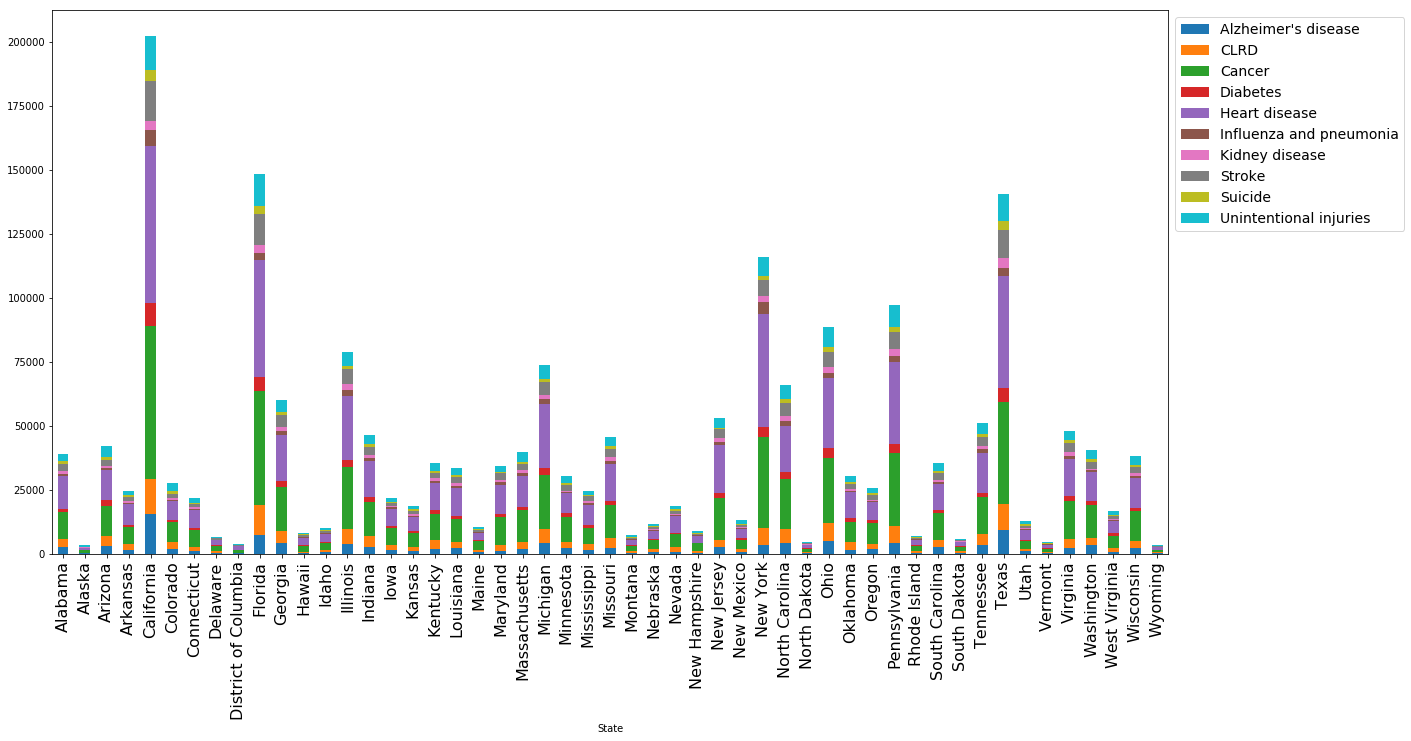

In [11]:
df_2016.pivot(index='State', columns='Cause Name', values='Deaths').plot(kind='bar', stacked=True, legend=False, figsize=(20,10))
plt.legend(loc='upper left', prop={'size':14}, bbox_to_anchor=(1,1))
plt.xticks(fontsize="16")

# Looking at suicides

## the raw numbers

-----------------
### using loc to obtain information for suicides only

In [12]:
suicide = death.loc[death['Cause Name'] == "Suicide"]
suicide = suicide.iloc[:,0:3]

suicide = suicide.reset_index()
print(suicide.head())

     State  Year Cause Name  Deaths
0  Alabama  2016    Suicide     788
1  Alabama  2015    Suicide     750
2  Alabama  2014    Suicide     715
3  Alabama  2013    Suicide     721
4  Alabama  2012    Suicide     724


# Comparing suicide data from 1999 and 2016 
------------------------- 

# Slice and append! 

![snap](https://media2.giphy.com/media/pKesvivyxwmJO/giphy.gif?cid=3640f6095c0855005a516c516f75201c.gif[snap])

In [29]:
#Slicing
syear_1999 = suicide.loc[suicide["Year"] == 1999]
syear_2016 = suicide.loc[suicide["Year"] == 2016]

#Appending data from 1999 and 2016
s9916 = syear_1999.append(syear_2016)
print(s9916.head())
print(s9916.tail())


s9916 = s9916.loc[s9916['State'] != "United States"]


         State  Year Cause Name  Deaths
17     Alabama  1999    Suicide     555
35      Alaska  1999    Suicide      96
53     Arizona  1999    Suicide     766
71    Arkansas  1999    Suicide     336
89  California  1999    Suicide    3077
             State  Year Cause Name  Deaths
846       Virginia  2016    Suicide    1166
864     Washington  2016    Suicide    1141
882  West Virginia  2016    Suicide     362
900      Wisconsin  2016    Suicide     866
918        Wyoming  2016    Suicide     144


# Plotting raw suicide data

-----------------

## Number of actual suicides by state in 1999 (darker bar) and 2016 (ligher bar)

#### Note: These bars are on the same axis and do not represent part of a whole

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

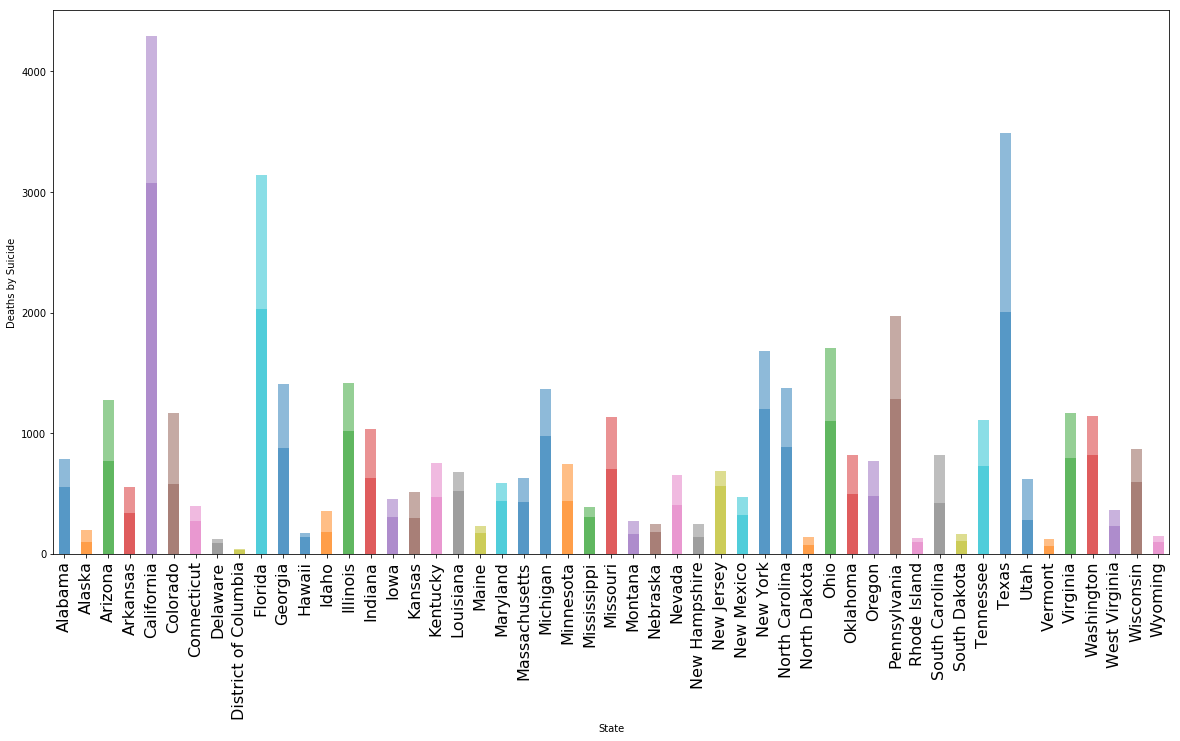

In [14]:
fig, ax = plt.subplots()

s9916_p1 = s9916.groupby('Year').plot(x='State', y='Deaths', legend=False, kind="bar", alpha=0.5,ax=ax,figsize=(20,10))
plt.ylabel('Deaths by Suicide')
plt.xticks(fontsize="16")

# A different representation of the same raw data

-----------------

#### via pivoting!

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

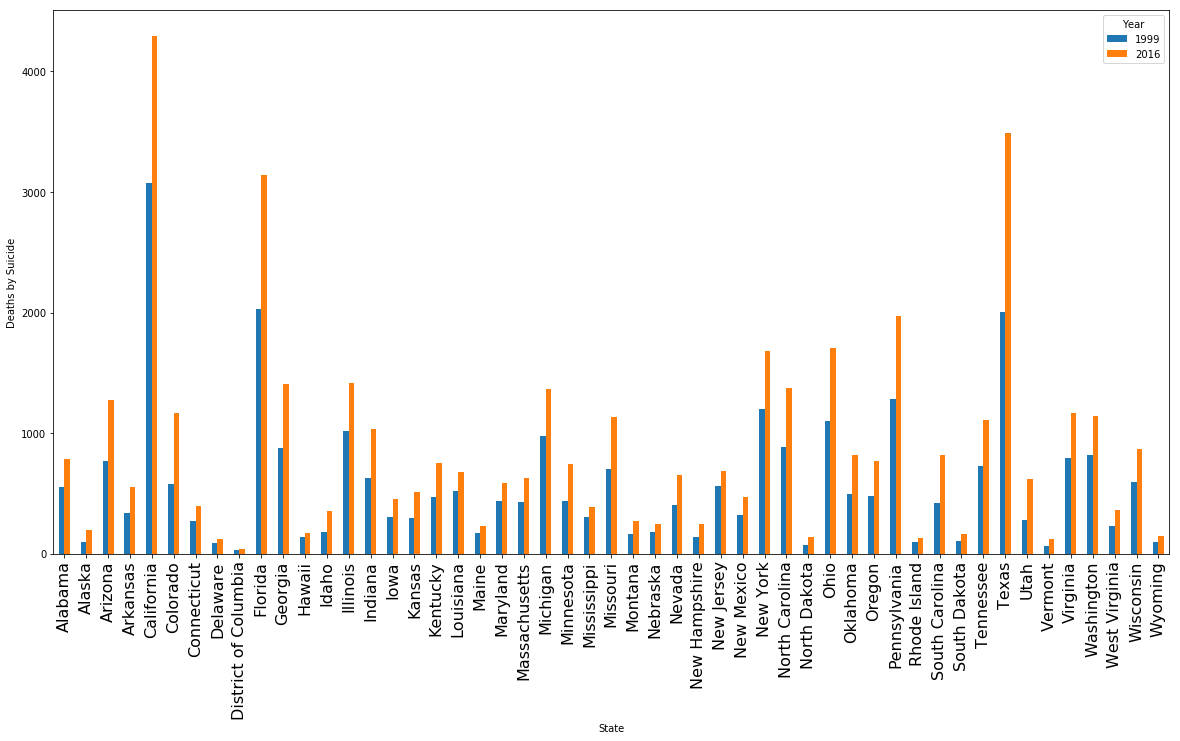

In [15]:
s9916_p2 = s9916.pivot(index='State', columns='Year', values='Deaths').plot(kind='bar', figsize=(20,10))
plt.ylabel('Deaths by Suicide')
plt.xticks(fontsize="16")

-----------

# Moving from raw data to percentages

-----------

### Adding total deaths to dataframe

In [33]:
syear_16_2 = syear_2016.set_index("State")
syear_99_2 = syear_1999.set_index("State")

#Total deaths
total_all_years=death.sort_values(by=['Cause Name'])


total_all_years=total_all_years.loc[total_all_years['Cause Name'] == "All causes"]


#total deaths in 1999
total_1999 = total_all_years.loc[total_all_years['Year'] == 1999]
total_1999 = total_1999.reset_index()
total_1999 = total_1999.set_index("State")
total_1999 = total_1999.sort_values(by=['State'])
total_1999 = total_1999.iloc[:,0:3]


#total deaths in 2016
total_2016 = total_all_years.loc[total_all_years['Year'] == 2016]
total_2016 = total_2016.reset_index()
total_2016 = total_2016.set_index("State")
total_2016 = total_2016.sort_values(by=['State'])
total_2016 = total_2016.iloc[:,0:3]


#Adding total deaths to number of suicides
syear_99_2['Total Deaths in 1999'] = total_1999['Deaths'].values
syear_16_2['Total Deaths in 2016'] = total_2016['Deaths'].values
print(syear_99_2.head())
print(syear_16_2.head())

            Year Cause Name  Deaths  Total Deaths in 1999
State                                                    
Alabama     1999    Suicide     555                 44806
Alaska      1999    Suicide      96                  2708
Arizona     1999    Suicide     766                 40050
Arkansas    1999    Suicide     336                 27925
California  1999    Suicide    3077                229380
            Year Cause Name  Deaths  Total Deaths in 2016
State                                                    
Alabama     2016    Suicide     788                 52466
Alaska      2016    Suicide     193                  4494
Arizona     2016    Suicide    1271                 56645
Arkansas    2016    Suicide     555                 31756
California  2016    Suicide    4294                262240



### Dividing suicides by deaths (x100) to get percentage of deaths that were suicides
-----------

In [34]:
syear_99_2[['Suicide (Percent)']] = syear_99_2[['Deaths']].div(syear_99_2['Total Deaths in 1999'].values,axis=0)
syear_99_2.loc[:,'Suicide (Percent)'] *= 100

syear_16_2[['Suicide (Percent)']] = syear_16_2[['Deaths']].div(syear_16_2['Total Deaths in 2016'].values,axis=0)
syear_16_2.loc[:,'Suicide (Percent)'] *= 100

print(syear_99_2.head())
print(syear_16_2.head())

            Year Cause Name  Deaths  Total Deaths in 1999  Suicide (Percent)
State                                                                       
Alabama     1999    Suicide     555                 44806           1.238673
Alaska      1999    Suicide      96                  2708           3.545052
Arizona     1999    Suicide     766                 40050           1.912609
Arkansas    1999    Suicide     336                 27925           1.203223
California  1999    Suicide    3077                229380           1.341442
            Year Cause Name  Deaths  Total Deaths in 2016  Suicide (Percent)
State                                                                       
Alabama     2016    Suicide     788                 52466           1.501925
Alaska      2016    Suicide     193                  4494           4.294615
Arizona     2016    Suicide    1271                 56645           2.243799
Arkansas    2016    Suicide     555                 31756           1.747701

In [18]:
#removing US
syear_99_3 = syear_99_2.reset_index()
syear_16_3 = syear_16_2.reset_index()

syear_99_3 = syear_99_3.loc[syear_99_3['State'] != "United States"]
syear_16_3 = syear_16_3.loc[syear_16_3['State'] != "United States"]

-------------------

# Change in Percent Suicides from 1999 to 2016 by State

-------------------

        State  Year Cause Name  Deaths  Total Deaths in 2016  \
0     Alabama  2016    Suicide     788                 52466   
1      Alaska  2016    Suicide     193                  4494   
2     Arizona  2016    Suicide    1271                 56645   
3    Arkansas  2016    Suicide     555                 31756   
4  California  2016    Suicide    4294                262240   

   Suicide (Percent)    Change  
0           1.501925  0.263252  
1           4.294615  0.749563  
2           2.243799  0.331190  
3           1.747701  0.544478  
4           1.637431  0.295989  


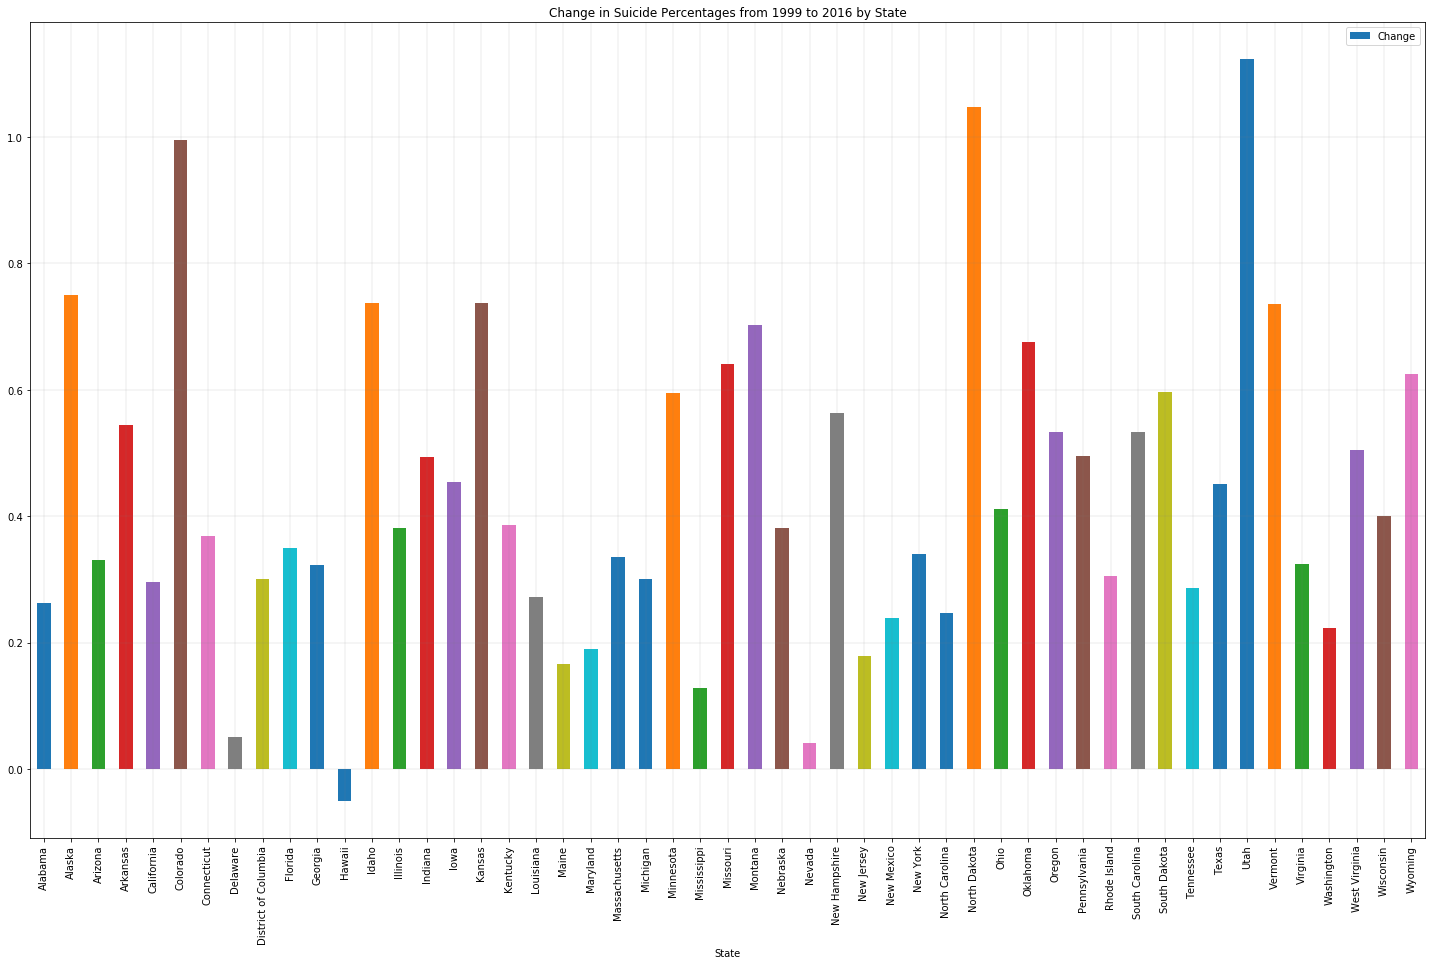

In [19]:
syear_16_3["Change"] = syear_16_3['Suicide (Percent)'] - syear_99_3['Suicide (Percent)']
print(syear_16_3.head())
s_p_9916 = syear_99_3.append(syear_16_3, sort=False)
syear_16_3.plot(kind='bar',x='State',y='Change', title="Change in Suicide Percentages from 1999 to 2016 by State", figsize=(25,15))
plt.grid(color='grey', linestyle='-', linewidth=.3, alpha=0.5)

### Hawaii's rate is the only that has declined from 1999 to 2016!
___________

# Considering state populations 

___________

## Importing and tweaking new data 

-----------

In [35]:
#importing and renaming columns
pop = pd.read_csv("https://raw.githubusercontent.com/BIOF309/group-project-hacking-pythonistas/master/notebooks/uspop.csv", index_col="NAME")
pop = pop.loc[:,"POPESTIMATE2010":"POPESTIMATE2016"]
pop = pop.iloc[5:,:]
pop.columns = ["2010", "2011", "2012", "2013", "2014", "2015", "2016"]
pop.index.name = 'State'

#getting rid of Puerto Rico

pop = pop.drop("Puerto Rico")
print(pop.tail())

                  2010     2011     2012     2013     2014     2015     2016
State                                                                       
Virginia       8025206  8107548  8188656  8261689  8316902  8366767  8414380
Washington     6741386  6819155  6890899  6963410  7046931  7152818  7280934
West Virginia  1854315  1854891  1855360  1852333  1847624  1839767  1828637
Wisconsin      5690403  5705812  5721075  5736673  5751272  5759744  5772917
Wyoming         564376   567602   576608   582341   583334   586102   584910


---------- 
# Examining 2016 Data
-----------
### Adding 2016 population data to deaths dataframe 
---------

In [21]:
#Adding 2016 population to deaths data frame 
pop_16 = pop[["2016"]]
pop_16 = pop_16.reset_index()
pop_16 = pop_16.sort_values(by=['State'])
syear_16_4 = syear_16_3.sort_values(by=['State'])
pop_s_16 = pd.merge(syear_16_4, pop_16, on='State')

print(pop_s_16.head(5))


        State  Year Cause Name  Deaths  Total Deaths in 2016  \
0     Alabama  2016    Suicide     788                 52466   
1      Alaska  2016    Suicide     193                  4494   
2     Arizona  2016    Suicide    1271                 56645   
3    Arkansas  2016    Suicide     555                 31756   
4  California  2016    Suicide    4294                262240   

   Suicide (Percent)    Change      2016  
0           1.501925  0.263252   4860545  
1           4.294615  0.749563    741522  
2           2.243799  0.331190   6908642  
3           1.747701  0.544478   2988231  
4           1.637431  0.295989  39296476  


-----------
### Finding total deaths per population
_________

In [22]:
#Total deaths in 2016 divided by population of each state in 2016
pop_s_16[['Normalized Death']] = pop_s_16[['Total Deaths in 2016']].div(pop_s_16['2016'].values,axis=0)
print(pop_s_16.head())

        State  Year Cause Name  Deaths  Total Deaths in 2016  \
0     Alabama  2016    Suicide     788                 52466   
1      Alaska  2016    Suicide     193                  4494   
2     Arizona  2016    Suicide    1271                 56645   
3    Arkansas  2016    Suicide     555                 31756   
4  California  2016    Suicide    4294                262240   

   Suicide (Percent)    Change      2016  Normalized Death  
0           1.501925  0.263252   4860545          0.010794  
1           4.294615  0.749563    741522          0.006061  
2           2.243799  0.331190   6908642          0.008199  
3           1.747701  0.544478   2988231          0.010627  
4           1.637431  0.295989  39296476          0.006673  


Text(0.5,0,'State')

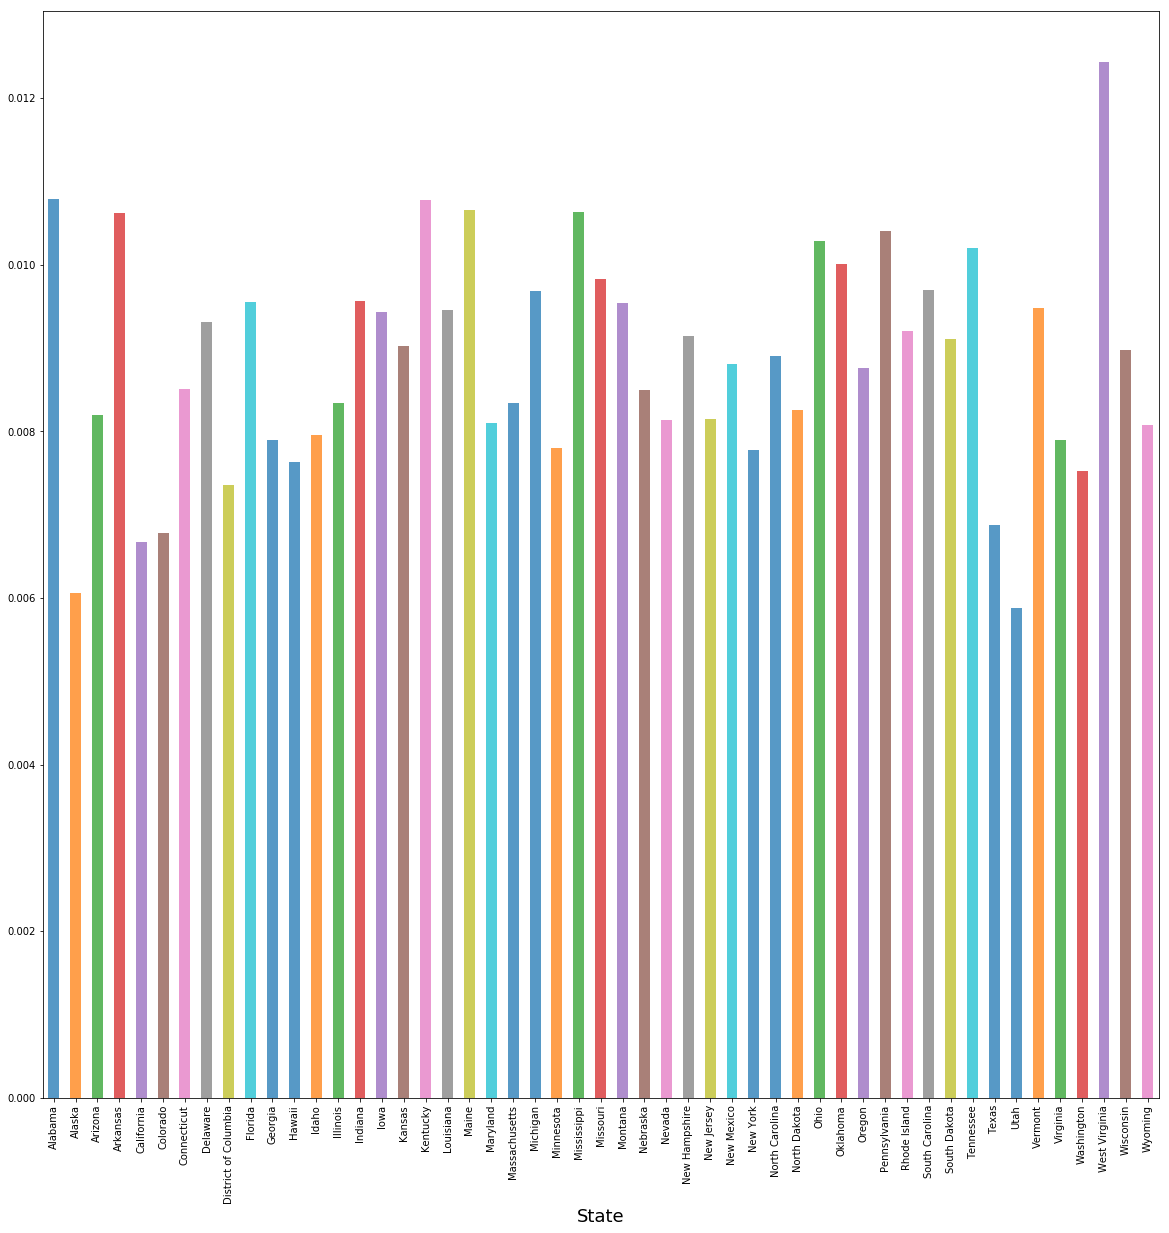

In [23]:
#Plotting normalized deaths
fig, ax = plt.subplots()
pop_deaths_16 = pop_s_16.groupby('Year').plot(x='State', y='Normalized Death', legend=False, kind="bar", alpha=0.75,ax=ax,figsize=(20,20))
plt.xlabel('State', fontsize=18)

### Sorting the data would make it easier to read
---------------
#### Sorted by normalized death rate

In [24]:
#sorting data to show the deadliest state!

pop_s_16_2 = pop_s_16.sort_values(by=['Normalized Death'])
print(pop_s_16_2.head())


         State  Year Cause Name  Deaths  Total Deaths in 2016  \
44        Utah  2016    Suicide     620                 17913   
1       Alaska  2016    Suicide     193                  4494   
4   California  2016    Suicide    4294                262240   
5     Colorado  2016    Suicide    1168                 37530   
43       Texas  2016    Suicide    3488                191966   

    Suicide (Percent)    Change      2016  Normalized Death  
44           3.461173  1.122477   3044321          0.005884  
1            4.294615  0.749563    741522          0.006061  
4            1.637431  0.295989  39296476          0.006673  
5            3.112177  0.995189   5530105          0.006786  
43           1.816988  0.451724  27904862          0.006879  


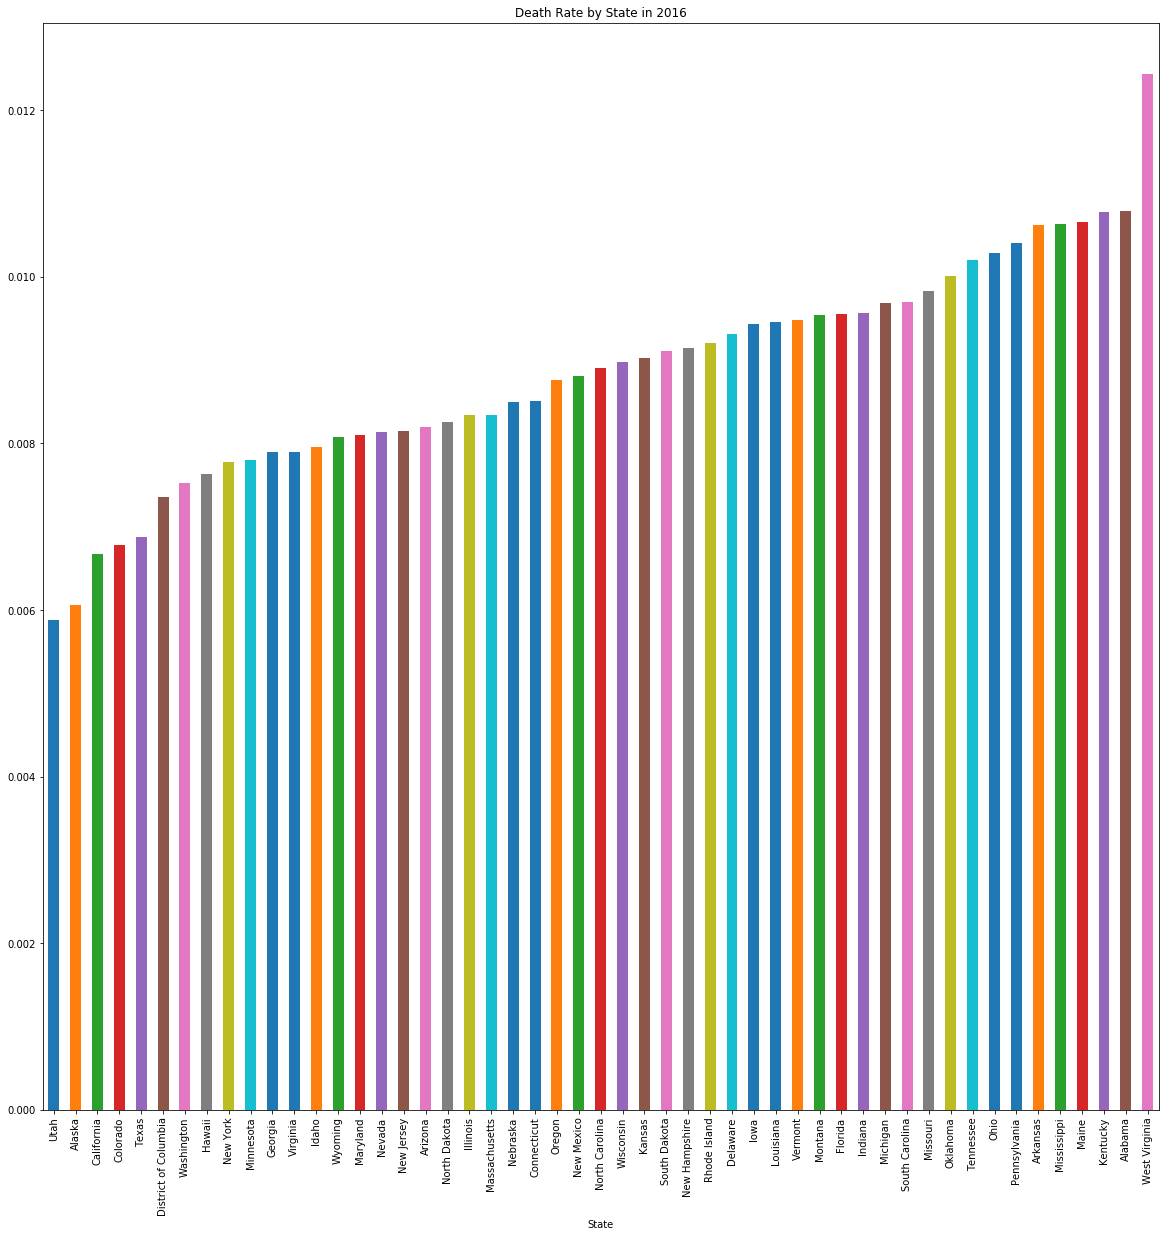

In [25]:
pop_s_16_2.plot(kind='bar',x='State',y='Normalized Death', title="Death Rate by State in 2016", figsize=(20,20), legend=False)

### Wow West Virginia, you ok pal???
-----------------

# Looking at suicide rate within a population 

------------------

In [26]:
# suicide rate 

pop_s_16[['Suicide Rate']] = pop_s_16[['Deaths']].div(pop_s_16['2016'].values,axis=0)
pop_s_16_3 = pop_s_16.sort_values(by=['Suicide Rate'])
print(pop_s_16_3.head())


                   State  Year Cause Name  Deaths  Total Deaths in 2016  \
8   District of Columbia  2016    Suicide      40                  5037   
30            New Jersey  2016    Suicide     687                 73155   
32              New York  2016    Suicide    1679                154358   
21         Massachusetts  2016    Suicide     631                 56961   
20              Maryland  2016    Suicide     586                 48824   

    Suicide (Percent)    Change      2016  Normalized Death  Suicide Rate  
8            0.794123  0.300378    684336          0.007360      0.000058  
30           0.939102  0.178096   8978416          0.008148      0.000077  
32           1.087731  0.339890  19836286          0.007782      0.000085  
21           1.107775  0.335927   6823721          0.008347      0.000092  
20           1.200229  0.190691   6024752          0.008104      0.000097  


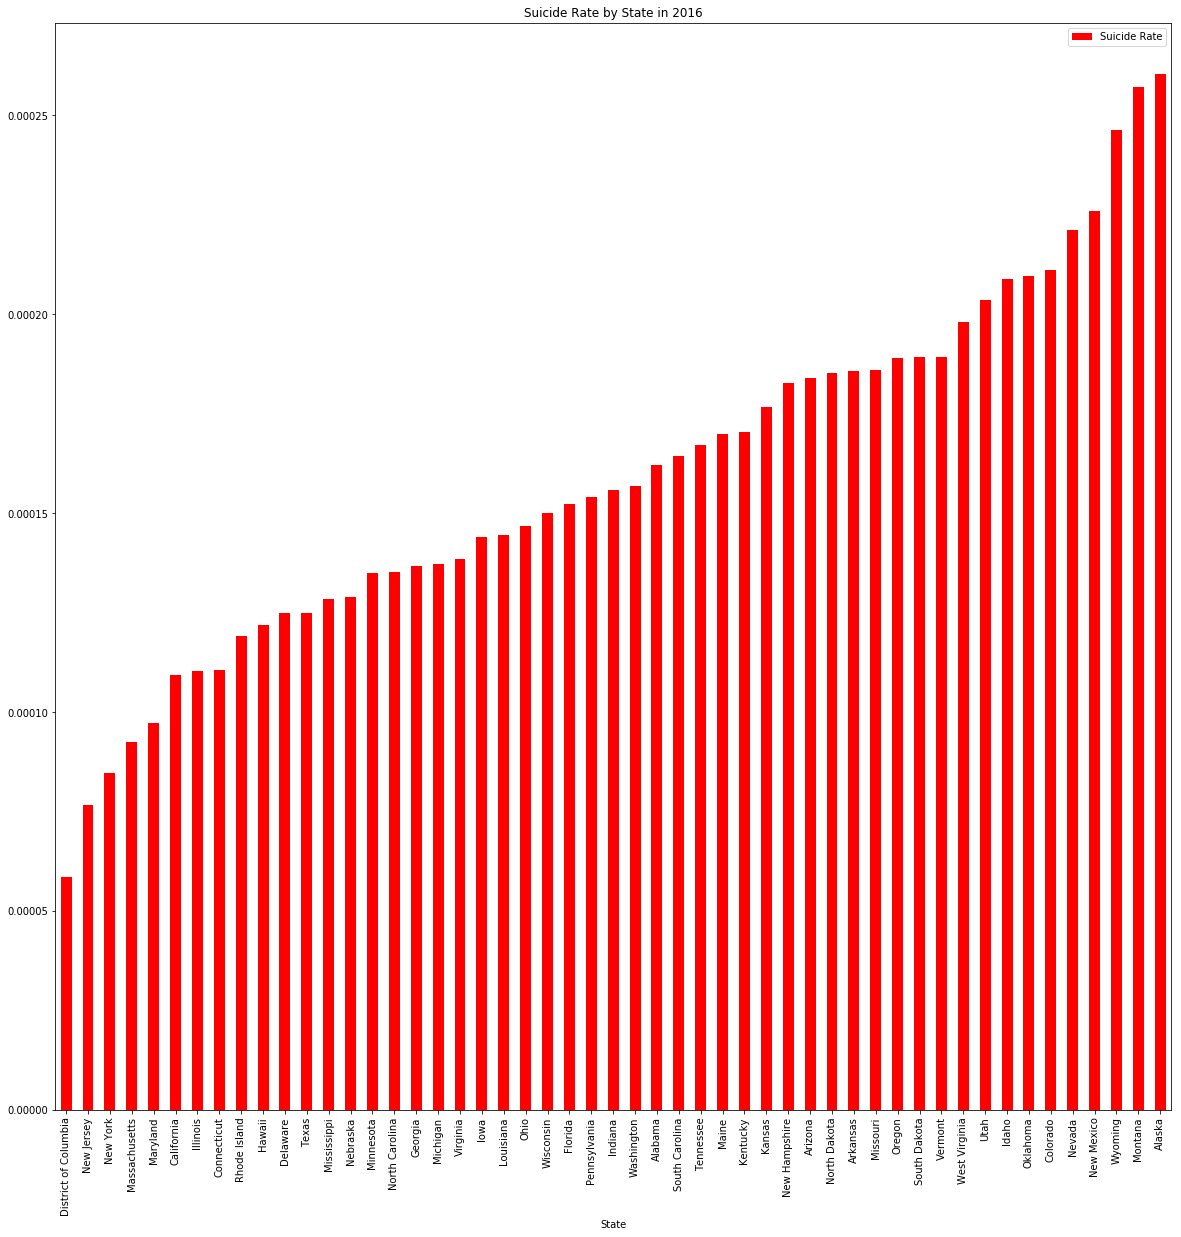

In [27]:
pop_s_16_3.plot(kind='bar',x='State',y='Suicide Rate', title="Suicide Rate by State in 2016", figsize=(20,20), color="red")

## Things are not looking good for the midwest......

-------

--------
-------


![suicideprev](https://tvlvmcjg4f-flywheel.netdna-ssl.com/wp-content/uploads/2016/08/NSPL_Logo.jpg "name")